# 🎯 **Demonstração Prática de Aprendizado com PyTorch**


## 📝 **Sobre este Notebook**

Neste notebook, apresentaremos uma **demonstração prática** do uso do framework **PyTorch** para o treinamento de um modelo de **aprendizado profundo (Deep Learning)**.

---

### **Dataset Utilizado: FashionMNIST**

- **Descrição:**  
  O dataset escolhido para esta demonstração é o **FashionMNIST**, fornecido pela biblioteca **TorchVision**.  
  É um conjunto de dados amplamente utilizado como substituto do clássico MNIST, com o objetivo de testar modelos em problemas de classificação mais desafiadores.

- **Características:**  
  - Imagens em **escala de cinza** com tamanho **28x28 pixels**.  
  - **10 categorias** de artigos de vestuário, incluindo:  
    - Camisetas  
    - Calças  
    - Sapatos  
    - Bolsas, entre outros.  
  - Cada imagem está associada a uma classe, facilitando o aprendizado supervisionado.

## 🔍 **Objetivo do Notebook**

O objetivo deste notebook é demonstrar o processo completo de criação e treinamento de um modelo de aprendizado profundo, utilizando o **PyTorch** com o dataset **FashionMNIST**. Serão abordadas as principais etapas para construir um pipeline eficiente de Deep Learning.

---

### **O projeto abordará as seguintes etapas:**

1. **Instalação e Importação de Bibliotecas**  
   Preparar o ambiente com as ferramentas necessárias, como PyTorch e TorchVision.

2. **Configuração do Dispositivo (CPU/GPU)**  
   Garantir que o modelo seja treinado na **GPU**, se disponível, para maior eficiência.

3. **Definição de Hiperparâmetros**  
   Ajustar valores como tamanho de batch, taxa de aprendizado e número de épocas.

4. **Preparação do Dataset e Transformações**  
   Carregar o dataset **FashionMNIST** e aplicar transformações como normalização e data augmentation.

5. **Definição do Modelo**  
   Criar a arquitetura da rede neural, incluindo camadas convolucionais e fully connected.

6. **Configuração da Função de Perda e Otimizador**  
   Escolher a função de custo (ex.: Cross-Entropy) e o otimizador (ex.: Adam).

7. **Loop de Treinamento**  
   Implementar o loop de treinamento, com forward pass, cálculo da perda, backward pass e atualização dos pesos.

8. **Avaliação do Modelo no Conjunto de Teste**  
   Avaliar o desempenho do modelo usando dados separados para teste.

9. **Salvamento do Modelo**  
   Salvar os pesos do modelo para uso futuro.

10. **Carregando o Modelo**  
    Demonstrar como carregar um modelo previamente treinado.

11. **Obtendo novas respostas com o modelo carregado**  
    Usar o modelo carregado para fazer inferências em novos dados.


In [1]:
## 1. Instalar e Importar Bibliotecas


'''
- Antes de tudo, é necessário ter o PyTorch instalado.
- Após instalação do PyTorch, precisamos reiniciar o Kernel, substituindo nas configurações do Notebbok (Edit -> Notebook Seetings -> Hardware accelerator: definir para GPU)

'''

# !pip install torch torchvision

# Importando as bibliotecas do PyTorch:
import torch                                  # Biblioteca principal do PyTorch.
import torch.nn as nn                         # Módulo para criação de redes neurais.
import torch.optim as optim                   # Otimizadores (como SGD, Adam).
import torch.nn.functional as F               # Funções de ativação e perda (como ReLU, cross-entropy).
import torchvision                            # Biblioteca para trabalhar com datasets, transformações de dados e modelos pré-treinados.
import random                                 # Biblioteca para definição de seed e garantir reprodutibilidade
from torchvision import datasets, transforms  # Acesso ao datasets padrão: FashionMNIST & Transformações de dados (normalização, conversão para tensor, data augmentation).
from torch.utils.data import DataLoader       # Cria iteradores para carregar os dados em lotes (mini-batches).

# Importando as bibliotecas para visualização de dados
import matplotlib.pyplot as plt                   # Biblioteca de visualização para criar gráficos 2D
import seaborn as sns                             # Biblioteca baseada no Matplotlib, com foco em gráficos estatísticos
import numpy as np                                # Biblioteca para operações matemáticas de alto desempenho
from sklearn.metrics import confusion_matrix      # Ferramenta para calcular a matriz de confusão
from sklearn.metrics import classification_report # Ferramenta para calcular as avaliações complementares: Precision, Recall e F1-Score



print('Importação Concluída')

Importação Concluída


In [2]:
## 2. Definir Dispositivo (CPU ou GPU) e Seed


# Defininindo dispositivo:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

if device.type == 'cuda':
    print(f"Nome da GPU: {torch.cuda.get_device_name(0)}")
    print(f"Memória Total da GPU: {torch.cuda.get_device_properties(0).total_memory / 1e9} GB")
else:
    print("GPU não disponível. Utilizando CPU.")

# Defininindo seed:
torch.manual_seed(865)
random.seed(865)
np.random.seed(865)
if device.type == 'cuda':
    torch.cuda.manual_seed_all(865)

Nome da GPU: Tesla T4
Memória Total da GPU: 15.835660288 GB


### Tabela de Hiperparâmetros

| Hiperparâmetro | Valor | Descrição |
|---|---|---|
| `batch_size` | 64 | Número de exemplos processados de uma vez. |
| `learning_rate` | 0.001 | Taxa de aprendizado para atualização dos pesos. |
| `num_epochs` | 5 | Número de vezes que o modelo passará por todo o conjunto de treinamento. |

#### Justificativa

**Batch Size:** Um tamanho de 64 é comumente usado para equilibrar a eficiência de memória e a estabilidade do gradiente durante o treinamento. Valores muito pequenos podem levar a oscilações no processo de otimização, enquanto valores muito grandes podem exigir muita memória da GPU.

**Learning Rate:** 0.001 é uma taxa inicial padrão para o otimizador Adam, proporcionando uma convergência estável na maioria dos casos. Essa taxa controla a magnitude das atualizações dos pesos do modelo a cada iteração, e um valor adequado é crucial para evitar mínimos locais e garantir uma boa performance.

**Número de Épocas:** 5 épocas são suficientes para observar as tendências iniciais de treinamento e avaliar o comportamento do modelo sem sobrecarregar o processo, especialmente em experimentos preliminares. Dependendo dos resultados, esse valor pode ser ajustado posteriormente para otimizar o desempenho final.

In [3]:
## 3. Configurar Hiperparâmetros


# Definimos os parâmetros essenciais para o treinamento do modelo:

# Tamanho de cada mini-batch
batch_size = 64

# Taxa de aprendizado para o otimizador
learning_rate = 0.001

# Número de épocas de treinamento
num_epochs = 6

### Detalhes das Transformações

As transformações são uma parte crucial do pipeline de aprendizado de máquina, pois garantem que os dados estejam no formato correto e com as propriedades desejadas para o treinamento do modelo.

Esta transformação realiza a conversão de imagens representadas como objetos PIL Image ou NumPy arrays para tensores PyTorch. Essa conversão é essencial, pois o PyTorch opera primariamente com tensores para realizar cálculos e otimizações.

#### *transforms.ToTensor()* - Por que isso é importante?

- **Compatibilidade:** Os tensores são a estrutura de dados fundamental do PyTorch. Ao converter as imagens para tensores, asseguramos que elas sejam compatíveis com as operações do PyTorch, como as operações de redes neurais.
- **Eficiência:** Os tensores são otimizados para operações matemáticas em GPUs, o que pode acelerar significativamente o processo de treinamento.

#### *transforms.Normalize(mean, std)* - Por que isso é importante?

- **Convergência mais rápida:** A normalização ajuda a evitar que os pesos do modelo sejam influenciados por diferenças de escala entre as features. Isso pode levar a uma convergência mais rápida durante o treinamento.
- **Melhora da performance:** Normalizar os dados pode melhorar o desempenho do modelo, principalmente em tarefas de classificação de imagens.

In [4]:
## 4. Preparar o Dataset e Transformações


# Criando os transformadores de dados:
transform = transforms.Compose([
    transforms.ToTensor(), # Vamos converter Image ou NumPy array para TENSOR
    transforms.Normalize((0.5, ), (0.5, )) # Vamos normalizar com média=0,5 e desvio padrão=0,5
])

# Definindo o caminho:
path = '/'

# Fazendo download do DataSet FashionMNIST, transformando e separando para TREINO:
full_train_dataset = datasets.FashionMNIST(
    root=path,
    train=True,
    download=True,
    transform=transform
)

# Fazendo download do DataSet FashionMNIST, transformando e separando para TESTE:
test_dataset = datasets.FashionMNIST(
    root=path,
    train=False,
    download=True,
    transform=transform
)

print('Downloads finalizados')

# Separando o "full_train_dataset" em 80% para treinamento e 20% para validação deste treinamento:
train_size = int(0.8 * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size

train_dataset, val_dataset = torch.utils.data.random_split(full_train_dataset, [train_size, val_size])

# Criando os DataLoaders:
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True # Embaralha os dados a cada Época durante o treinamento
)

val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False
)

print('Dados carregados')

Downloads finalizados
Dados carregados


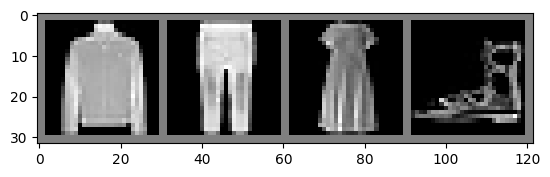

Classes [4, 1, 3, 5]


In [5]:
## EXTRA: EXIBINDO IMAGENS


# Função para exibir imagens:
def imgshow(img):
  img = img / 2 + 0.5 # para desnormalizar
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
  plt.show()

# Obtendo um lote de imagens:
dataiter = iter(train_loader)
images, labels = next(dataiter)


# Mostrando imagens:
imgshow(torchvision.utils.make_grid(images[:4]))
print('Classes', labels[:4].tolist())

### **Arquitetura da Rede Neural**

A arquitetura da rede neural utilizada neste projeto é composta por **camadas convolucionais**, **camadas de pooling**, **camadas fully connected** e **funções de ativação**.

---

#### **Camadas de Processamento**

##### **1. Camadas Convolucionais**

- **conv1:**  
  Recebe imagens em escala de cinza (1 canal) como entrada e aplica **32 filtros convolucionais** de tamanho **3x3**. A convolução extrai características importantes da imagem, como bordas e texturas.

- **conv2:**  
  A saída da camada `conv1` é passada para a camada `conv2`, que aplica **64 filtros convolucionais** de tamanho **3x3**. Essa camada extrai características **mais complexas** a partir das características aprendidas na camada anterior.

**Funcionamento das Camadas Convolucionais:**

1. **Entrada:**  
   A entrada é geralmente uma imagem (ex.: 28x28 pixels no caso do FashionMNIST). Imagens em escala de cinza possuem **1 canal**, enquanto imagens coloridas (RGB) possuem **3 canais**.

2. **Filtros (Kernels):**  
   A camada convolucional aplica pequenos "filtros" (ou **kernels**) sobre a imagem. Cada filtro é uma matriz (ex.: 3x3 ou 5x5) que se move pela imagem, aprendendo padrões específicos como bordas ou texturas.

3. **Operação:**  
   Em cada posição, o filtro realiza uma **multiplicação elemento a elemento** com os valores dos pixels e soma os resultados, gerando um **mapa de ativação** que indica onde o padrão foi detectado.

4. **Vários Filtros:**  
   Uma única camada convolucional geralmente usa **vários filtros** (ex.: 32 ou 64), e cada filtro aprende um padrão diferente.

5. **Saída:**  
   O resultado é uma nova "imagem", mas com **várias camadas de profundidade** (uma para cada filtro).

---

##### **2. Camada de Pooling**

- **pool:**  
  Uma camada de **MaxPooling** com kernel de **2x2** é utilizada para reduzir a dimensionalidade espacial das representações.  
  - O **MaxPooling** seleciona o valor máximo em cada região 2x2, reduzindo a resolução da imagem e tornando o modelo mais **robusto a pequenas variações** na posição dos objetos.

---

##### **3. Camadas Fully Connected**

- **fc1:**  
  Após as camadas convolucionais e de pooling, a representação da imagem é **achatada** (flattened) em um vetor unidimensional. Este vetor é conectado à camada `fc1`, que possui **128 neurônios**. Essa camada aprende **padrões abstratos** combinando as características extraídas anteriormente.

- **fc2:**  
  A camada `fc1` é conectada à camada `fc2`, que possui **10 neurônios de saída**, correspondendo às **10 classes** do dataset FashionMNIST (ex.: camiseta, calça, sapato, etc.). Cada neurônio de saída representa a **probabilidade** da imagem pertencer a uma determinada classe.

**Funcionamento das Fully Connected:**

1. **Entrada:**  
   Recebem um vetor de entrada (ex.: uma imagem 28x28 é achatada em um vetor de 784 valores).

2. **Pesos:**  
   Cada neurônio possui um peso para cada valor de entrada. Isso significa que **todos os valores de entrada influenciam** a saída de cada neurônio.

3. **Operação Matemática:**  
   Para cada neurônio, o resultado é calculado como:  
   z = sum (x * w) + b
   Onde:  
   - x: valores de entrada.  
   - w: pesos do neurônio.  
   - b: viés (bias).

4. **Ativação:**  
   O valor z passa por uma **função de ativação** (ex.: ReLU ou Sigmoid) para introduzir **não-linearidade**.

5. **Saída:**  
   A camada gera um **vetor de saída** com tantas dimensões quanto o número de neurônios.

---

#### **Funções de Ativação**

- **ReLU (Rectified Linear Unit):**  
  A função de ativação ReLU é aplicada após cada camada convolucional e fully connected. Ela introduz **não-linearidade** no modelo, permitindo que ele aprenda **relações complexas** entre as características da imagem e as classes.

In [6]:
## 5. Definir o Modelo


class FashionModel(nn.Module):
    def __init__(self):
        super(FashionModel, self).__init__()

        # Camadas convolucionais:
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)

        # Camada de pooling para reduzir a dimensionalidade
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Camdas fully connected
        self.fc1 = nn.Linear(in_features=64 * 7 * 7, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10) # São 10 classes para serem classificadas

    # The forward function should be at this level, not nested inside __init__
    def forward(self, x):
        # 1a camada convolucional + ReLU + Pooling
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        # 2a camada convolucional + ReLU + Pooling
        x = F.relu(self.conv2(x))
        x = self.pool(x)

        # Achatar os dados para a camada fully connected
        x = x.view(x.size(0), -1)

        # Camada fully connected + ReLU
        x = F.relu(self.fc1(x))

        # Camada de saída
        x = self.fc2(x)

        return x

# Instanciar e enviar o modelo para o dispositivo:
model = FashionModel().to(device)
print(model)

FashionModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


### Justificativas para as Escolhas de Função de Perda e Otimizador

- CrossEntropyLoss: Ideal para classificação multi-classe, combina LogSoftmax e NLLLoss, simplificando o código e promovendo a eficácia.
- Adam Optimizer: Converge rapidamente, requer menos ajustes de hiperparâmetros e é robusto a diferentes dados e arquiteturas, tornando-o versátil e eficiente.


In [7]:
## 6. Definir Função de Perda e Otimizador


# Definição da função de perda
criterion = nn.CrossEntropyLoss()

# Definição do otimizador
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Época [1/6], Lote [100/750], Loss: 0.6904
Época [1/6], Lote [200/750], Loss: 0.7763
Época [1/6], Lote [300/750], Loss: 0.2282
Época [1/6], Lote [400/750], Loss: 0.4049
Época [1/6], Lote [500/750], Loss: 0.4737
Época [1/6], Lote [600/750], Loss: 0.3015
Época [1/6], Lote [700/750], Loss: 0.3930
** Época [1/6] Concluída **
Loss de Treino: 0.4627 | Loss de Validação: 0.3473 | Acurácia Val.: 87.28%

Época [2/6], Lote [100/750], Loss: 0.3482
Época [2/6], Lote [200/750], Loss: 0.2800
Época [2/6], Lote [300/750], Loss: 0.5394
Época [2/6], Lote [400/750], Loss: 0.3325
Época [2/6], Lote [500/750], Loss: 0.3813
Época [2/6], Lote [600/750], Loss: 0.1476
Época [2/6], Lote [700/750], Loss: 0.3900
** Época [2/6] Concluída **
Loss de Treino: 0.2972 | Loss de Validação: 0.2847 | Acurácia Val.: 89.72%

Época [3/6], Lote [100/750], Loss: 0.2898
Época [3/6], Lote [200/750], Loss: 0.6433
Época [3/6], Lote [300/750], Loss: 0.2840
Época [3/6], Lote [400/750], Loss: 0.3383
Época [3/6], Lote [500/750], Loss: 0

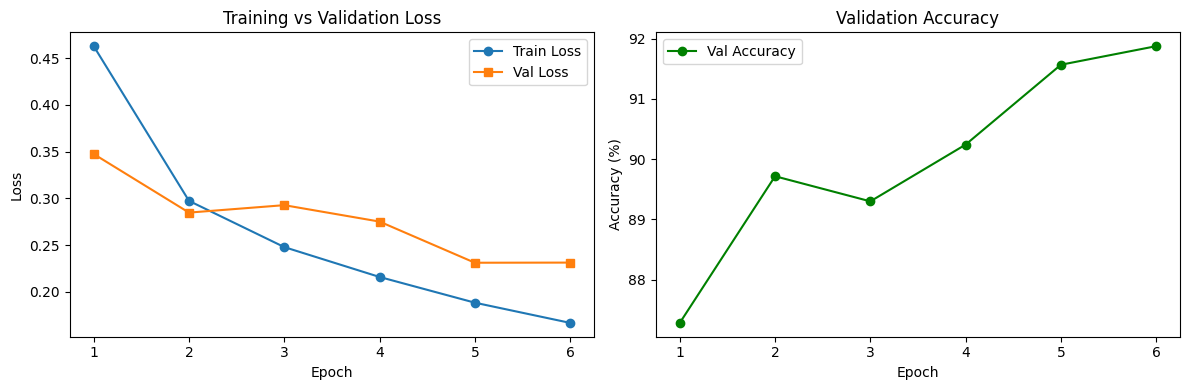

In [8]:
## 7. Loop de Treinamento com Validação


# Listas para armazenar perda de treino e de validação a cada época
train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    # Fase de Treinamento
    model.train()  # Define o modelo em modo de treinamento
    running_loss = 0.0  # Acumula a perda no treinamento

    for batch_idx, (images, labels) in enumerate(train_loader):
        # Enviar dados para o dispositivo (GPU/CPU)
        images = images.to(device)
        labels = labels.to(device)

        # Zerar os gradientes acumulados
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Cálculo da perda
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Atualização dos parâmetros
        optimizer.step()

        # Acumular perda
        running_loss += loss.item()

        # Opcional: exibir logs a cada 100 lotes
        if (batch_idx + 1) % 100 == 0:
            print(f'Época [{epoch+1}/{num_epochs}], Lote [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    # Cálculo da perda média da época (treinamento)
    epoch_train_loss = running_loss / len(train_loader)
    train_losses.append(epoch_train_loss)

    # Fase de Validação
    model.eval()  # Define o modelo em modo de avaliação
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    # Desativamos o gradiente durante a validação
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass no modo de avaliação
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Acumular perda
            val_loss += loss.item()

            # Prever a classe com maior pontuação
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    # Cálculo das métricas de validação
    val_loss = val_loss / len(val_loader)
    val_accuracy = 100.0 * val_correct / val_total

    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f'** Época [{epoch+1}/{num_epochs}] Concluída **')
    print(f'Loss de Treino: {epoch_train_loss:.4f} | Loss de Validação: {val_loss:.4f} | Acurácia Val.: {val_accuracy:.2f}%\n')


# Plotar Perda de Treinamento vs Validação e Acurácia de Validação
plt.figure(figsize=(12,4))

# Subplot 1: Perda de Treino vs Val
plt.subplot(1,2,1)  # 1 linha, 2 colunas, posição 1
plt.plot(range(1, num_epochs+1), train_losses, 'o-', label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, 's-', label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Subplot 2: Acurácia de Validação
plt.subplot(1,2,2)  # 1 linha, 2 colunas, posição 2
plt.plot(range(1, num_epochs+1), val_accuracies, 'o-', color='green', label='Val Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()  # Ajusta espaçamento entre subplots
plt.show()

Loss no Teste: 0.2349
Acurácia no Teste: 91.50%


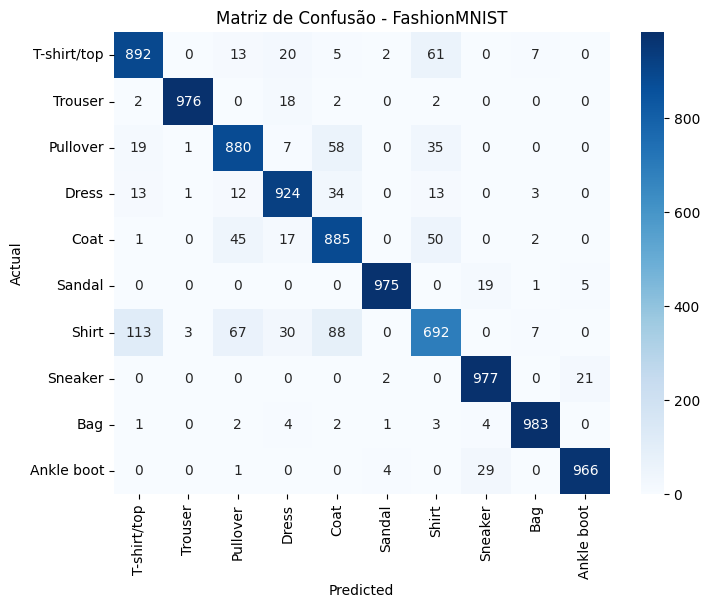

Relatório de Classificação (Test Set):

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.89      0.87      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.86      0.88      0.87      1000
       Dress       0.91      0.92      0.91      1000
        Coat       0.82      0.89      0.85      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.81      0.69      0.75      1000
     Sneaker       0.95      0.98      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.92      0.91     10000



In [9]:
## 8. Avaliação no Conjunto de Teste


# Entramos no modo de avaliação, pois não queremos atualizar pesos nem calcular gradientes:
model.eval()

# Inicializamos as variáveis de monitoraramento:
test_loss = 0.0   # Contagem de erros
test_correct = 0  # Contagem de acertos
test_total = 0    # Contagem de exemplos

# Criamos listas vazias para armazenar os dados que serão utilizadas na construção da Matriz de Confusão:
all_preds = []
all_labels = []

# 'with torch.no_grad()' desativa o cálculo de gradientes,
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        # Passamos as imagens pelo modelo para obter as predições.
        outputs = model(images)

        # Calculamos a perda (loss) com base nas saídas e rótulos, mas não chamamos backward() pois, não estamos treinando.
        loss = criterion(outputs, labels)

        # Somamos essa perda ao test_loss para termos a perda média em todo o conjunto de teste.
        test_loss += loss.item()

        # Usamos torch.max(outputs, 1) para obter o índice da classe com maior pontuação para cada exemplo no batch.
        _, predicted = torch.max(outputs, 1)

        # Para calcular a acurácia, verificamos quais predições estão corretas e incrementamos test_correct.
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

        # Para podermos analisar a matriz de confusão e gerar o relatório de classificação, guardamos as predições e rótulos.
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_loss = test_loss / len(test_loader)
test_accuracy = 100.0 * test_correct / test_total

print(f'Loss no Teste: {test_loss:.4f}')
print(f'Acurácia no Teste: {test_accuracy:.2f}%')

# MATRIZ DE CONFUSÃO E RELATÓRIO DE CLASSIFICAÇÃO
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_dataset.classes,  # Nome das classes no eixo X
            yticklabels=test_dataset.classes)   # Nome das classes no eixo Y
plt.title('Matriz de Confusão - FashionMNIST')
plt.xlabel('Predicted')   # Classes previstas
plt.ylabel('Actual')      # Classes verdadeiras
plt.show()

print("Relatório de Classificação (Test Set):\n")
print(classification_report(all_labels, all_preds, target_names=test_dataset.classes))

In [10]:
## 9. Salvar e Carregar o Modelo


# Salvar os pesos do modelo
torch.save(model.state_dict(), '/fashion_mnist_model.pth')
print("Modelo salvo com sucesso!")

Modelo salvo com sucesso!


In [11]:
## 10. Carregar o modelo


# Instanciar o modelo novamente
loaded_model = FashionModel()
loaded_model.load_state_dict(torch.load('/fashion_mnist_model.pth'))
loaded_model.to(device)
loaded_model.eval()
print("Modelo carregado e configurado para avaliação.")

Modelo carregado e configurado para avaliação.


<ipython-input-11-ea3fea85389f>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('/fashion_mnist_model.pth'))


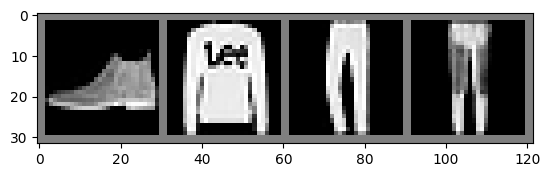

Rótulos Verdadeiros: [9, 2, 1, 1]
Previsões: [9, 2, 1, 1]


In [12]:
## 11. Nova consulta com modelo treinado


# Obter um lote de teste
dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

# Fazer previsões
with torch.no_grad():
    outputs = loaded_model(images)
    _, predicted = torch.max(outputs, 1)

# Mostrar algumas previsões
imgshow(torchvision.utils.make_grid(images.cpu()[:4]))
print(f'Rótulos Verdadeiros: {labels.cpu()[:4].tolist()}')
print(f'Previsões: {predicted.cpu()[:4].tolist()}')
